<h1 style="font-size:42px; text-align:center;">2. Data Cleaning and Feature Engineering</h1>
<hr>

In [97]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [98]:
df = pd.read_csv('./Data/employee_data.csv')

# Drop wanted observations

In [99]:
print('Shape before dropping: {}'.format(df.shape))
df = df.drop_duplicates()
print('Shape after dropping: {}'.format(df.shape))

Shape before dropping: (14249, 10)
Shape after dropping: (14221, 10)


***See we had some duplicate observations in the data***

In [100]:
depts = df.department.unique()
depts

array(['engineering', 'support', 'sales', 'IT', 'product', 'marketing',
       'temp', 'procurement', 'finance', nan, 'management',
       'information_technology', 'admin'], dtype=object)

> * We can drop all observations which belong to <code style="color:crimson">temp</code> department as the employees in this department are already temporary. They'd leave sooner or later.

In [101]:
tempidx = df[df.department == 'temp'].index #returning index of rows having department = temp
df = df.drop(index=tempidx)
print(df.shape)

(14068, 10)


# Fix structural errors

In [102]:
print(df.filed_complaint.unique())
print(df.recently_promoted.unique())

[nan  1.]
[nan  1.]


> * Looks like <code style="color:crimson">filed_complaint</code> and <code style="color:crimson">recently_promoted</code> features are binary feature, ***1->True and NaN -> False***.<br>
Algorithms can't handle NaN values hance replacing them with 0.

In [103]:
df.filed_complaint = df.filed_complaint.fillna(0)
df.recently_promoted = df.recently_promoted.fillna(0)

**After replacing:**

In [104]:
print(df.filed_complaint.unique())
print(df.recently_promoted.unique())

[0. 1.]
[0. 1.]


> * From cell no 100, we can see we have two features, <code style="color:crimson">information_technology</code> and <code style="color:crimson">IT</code> which are same features with different names.<br>
Therefore, combining them together under one feature <code style="color:crimson">IT</code>

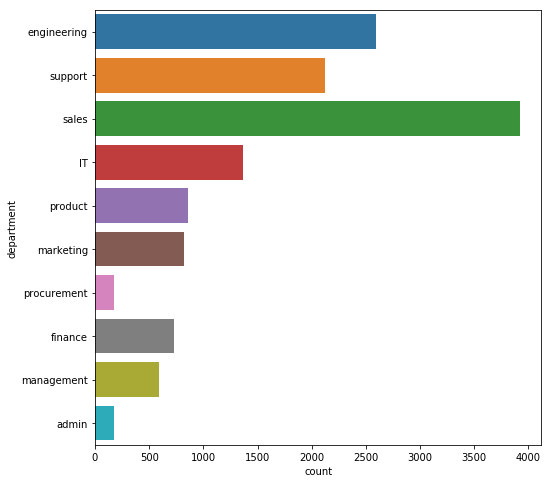

In [105]:
df.replace('information_technology', 'IT', inplace=True)

plt.figure(figsize=(8,8))
sns.countplot(y='department', data = df)
plt.show()

# Handling missing data

In [106]:
print(df.isnull().sum())

avg_monthly_hrs         0
department            709
filed_complaint         0
last_evaluation      1351
n_projects              0
recently_promoted       0
salary                  0
satisfaction            0
status                  0
tenure                  0
dtype: int64


**Missing values found in <code style="color:steelblue">department</code>, flagging them as <code style="color:crimson">"Missing"</code>.**

In [107]:
df.department = df.department.fillna('Missing')

**Missing values aslo found in <code style="color:steelblue">last_evaluation</code>, flagging with binary values:**
* <code style="color:crimson">0</code> if not missing.
* <code style="color:crimson">1</code> if missing. 

In [108]:
df['last_evaluation_missing'] = df.last_evaluation.isnull().astype(int) #or use isnull() for directly filling null as true
df.last_evaluation = df.last_evaluation.fillna(0)

### Confirming missing values again

In [111]:
df.isnull().sum()

avg_monthly_hrs            0
department                 0
filed_complaint            0
last_evaluation            0
n_projects                 0
recently_promoted          0
salary                     0
satisfaction               0
status                     0
tenure                     0
last_evaluation_missing    0
dtype: int64

## Conclusion:
> * Removed duplicate observations<br>
> * Combined similar columns/features<br>
> * Flagged Missing values<br>
<hr>

# Engineer features
We have seen during EDA that there is scope of engineering a feature based on <code style="color:steelblue">satisfaction</code> and <code style="color:steelblue">last_evaluation</code>

<Figure size 576x576 with 0 Axes>

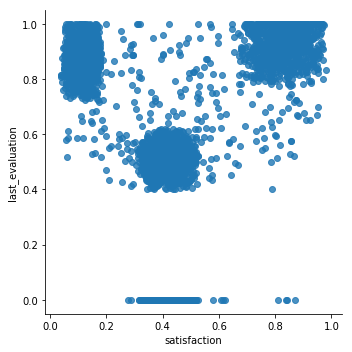

In [112]:
plt.figure(figsize=(8,8))
sns.lmplot(data=df[df.status == 'Left'], x='satisfaction', y='last_evaluation', fit_reg=False)
plt.show()

**Let's create indicators to describe above distribution of data:**
* <code style="color:steelblue">underperformer</code> - last_evaluation < 0.6 and last_evaluation_missing == 0
* <code style="color:steelblue">unhappy</code> - satisfaction_level < 0.2
* <code style="color:steelblue">overachiever</code> - last_evaluation > 0.8 and satisfaction > 0.7

In [113]:
df['unhappy'] = (df.satisfaction < 0.2).astype(int)
df['overachiever'] = ((df.satisfaction > 0.7) & (df.last_evaluation > 0.8)).astype(int)
df['underperformer'] = ((df.satisfaction < 0.6) & (df.last_evaluation_missing == 0)).astype(int) #avoiding missing observations

In [114]:
df[['underperformer', 'unhappy', 'overachiever']].mean()

underperformer    0.391314
unhappy           0.092195
overachiever      0.177069
dtype: float64

# Get dummy variables <span style="font-size: 15px;">for categorical data</span>

In [117]:
df.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,last_evaluation_missing,unhappy,overachiever,underperformer
0,221,engineering,0.0,0.932868,4,0.0,low,0.829896,Left,5.0,0,0,1,0
1,232,support,0.0,0.000000,3,0.0,low,0.834544,Employed,2.0,1,0,0,0
2,184,sales,0.0,0.788830,3,0.0,medium,0.834988,Employed,3.0,0,0,0,0
3,206,sales,0.0,0.575688,4,0.0,low,0.424764,Employed,2.0,0,0,0,1
4,249,sales,0.0,0.845217,3,0.0,low,0.779043,Employed,3.0,0,0,1,0


In [118]:
df['status'] = pd.get_dummies( df.status ).Left

In [131]:
fdf = pd.get_dummies(data = df, columns = ['department', 'salary'])
fdf.head(10)

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,status,tenure,last_evaluation_missing,unhappy,...,department_finance,department_management,department_marketing,department_procurement,department_product,department_sales,department_support,salary_high,salary_low,salary_medium
0,221,0.0,0.932868,4,0.0,0.829896,1,5.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,232,0.0,0.000000,3,0.0,0.834544,0,2.0,1,0,...,0,0,0,0,0,0,1,0,1,0
2,184,0.0,0.788830,3,0.0,0.834988,0,3.0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,206,0.0,0.575688,4,0.0,0.424764,0,2.0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,249,0.0,0.845217,3,0.0,0.779043,0,3.0,0,0,...,0,0,0,0,0,1,0,0,1,0
5,140,0.0,0.589097,4,0.0,0.660020,0,4.0,0,0,...,0,0,0,0,0,1,0,0,0,1
6,121,1.0,0.625399,3,0.0,0.835571,0,3.0,0,0,...,0,0,0,0,0,1,0,0,1,0
7,150,0.0,0.644586,4,0.0,0.796683,0,3.0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,215,1.0,0.524114,3,0.0,0.715005,0,7.0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,269,0.0,0.909364,5,0.0,0.994037,0,2.0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [133]:
fdf.to_csv('./Data/final_employee_data.csv', index = None)